E-commerce dataset shape: (151112, 204)
Credit Card dataset shape: (283726, 31)
=== E-commerce Saved Model Metrics ===
{'Precision': np.float64(0.9968536969061353), 'Recall': np.float64(0.5373471839445976), 'F1-Score': np.float64(0.6982873410165756), 'AUC-PR': np.float64(0.6439398445093183)}

=== Credit Card Saved Model Metrics ===
{'Precision': np.float64(0.6253776435045317), 'Recall': np.float64(0.8752642706131079), 'F1-Score': np.float64(0.7295154185022027), 'AUC-PR': np.float64(0.8234469185864088)}


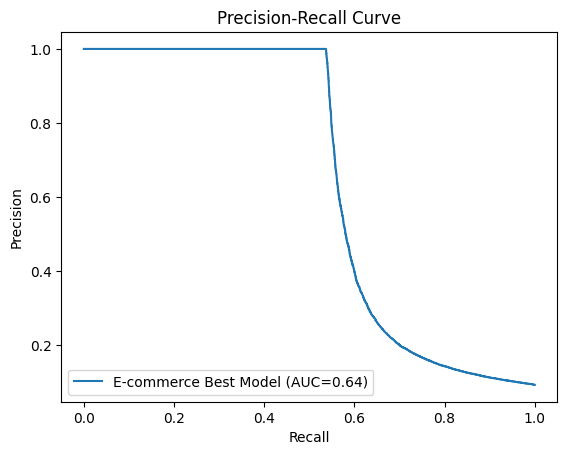

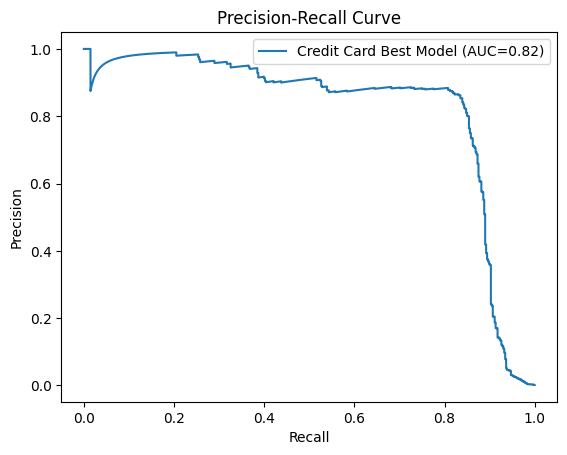

Metrics saved in C:/Users/derej/Desktop/Kifya/fraud_detection/reports\model_results_saved_models.csv


In [7]:
# =======================================
# Fraud Detection Modeling Notebook (Using Saved Models)
# =======================================
# Author: Dereje Derib
# Task: Task-2 modeling visualization & evaluation
# =======================================

# 1️⃣ Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, auc

# 2️⃣ Load Processed Datasets
ecom_df = pd.read_csv("../data/processed/fraud_data_final.csv")
cc_df = pd.read_csv("../data/processed/creditcard_final.csv")

print("E-commerce dataset shape:", ecom_df.shape)
print("Credit Card dataset shape:", cc_df.shape)

# 3️⃣ Load Saved Models
root_dir = "C:/Users/derej/Desktop/Kifya/fraud_detection/"
ecom_model = joblib.load(os.path.join(root_dir, "models/ecommerce_best_model.pkl"))
cc_model   = joblib.load(os.path.join(root_dir, "models/creditcard_best_model.pkl"))

# 4️⃣ Prepare Features & Target
# Drop target column & IDs for prediction
X_ecom = ecom_df.drop(columns=["class", "user_id", "device_id"], errors='ignore')
y_ecom = ecom_df["class"]

X_cc = cc_df.drop(columns=["Class"], errors='ignore')
y_cc = cc_df["Class"]

# 5️⃣ Evaluate Function
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:,1]
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    pr_auc = auc(*precision_recall_curve(y, y_prob)[:2][::-1])
    return {"Precision": precision, "Recall": recall, "F1-Score": f1, "AUC-PR": pr_auc}

# 6️⃣ Evaluate Saved Models
ecom_metrics = evaluate_model(ecom_model, X_ecom, y_ecom)
cc_metrics   = evaluate_model(cc_model, X_cc, y_cc)

print("=== E-commerce Saved Model Metrics ===")
print(ecom_metrics)
print()
print("=== Credit Card Saved Model Metrics ===")
print(cc_metrics)

# 7️⃣ Precision-Recall Curve Plot
def plot_pr_curve(model, X, y, model_name="Model"):
    y_prob = model.predict_proba(X)[:,1]
    precision, recall, _ = precision_recall_curve(y, y_prob)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{model_name} (AUC={pr_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()

plot_pr_curve(ecom_model, X_ecom, y_ecom, "E-commerce Best Model")
plot_pr_curve(cc_model, X_cc, y_cc, "Credit Card Best Model")

#Ensure the reports folder exists
os.makedirs(os.path.join(root_dir, "reports"), exist_ok=True)

# Create the metrics DataFrame
metrics_df = pd.DataFrame([
    {"Dataset": "E-commerce", **ecom_metrics},
    {"Dataset": "Credit Card", **cc_metrics}
])

# Save to CSV using root_dir
metrics_path = os.path.join(root_dir, "reports", "model_results_saved_models.csv")
metrics_df.to_csv(metrics_path, index=False)

print(f"Metrics saved in {metrics_path}")
